In [1]:
# Адаптируем размер тетрадки
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

<a id='31-bullet'></a>

<b> Название проекта: </b>
    
Исследование объявлений о продаже квартир

<b> Цель проекта: </b>

Научиться определять рыночную стоимость объектов недвижимости по параметрам.


    
В данном исследовании представлены данные из архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

<b> Данное исследование разделим на несколько частей:<b/>

##### Часть 1. Изучение общей информации:
* [1. Изучение файлов с данными, получение общей информации, загрузка библиотек.](#1-bullet)
* [2. Промежуточные выводы](#1.1-bullet)

##### Часть 2. Предобработка данных:
* [1. Работа с пропусками.](#2.1-bullet)
* [2. Преобразование данных в нужные типы.](#2.1-bullet)
* [3. Добавить в таблицу:](#2.3-bullet)
    * Цену квадратного метра;
    * День недели, месяц и год публикации объявления;
    * Этаж квартиры; варианты — первый, последний, другой;
    * Соотношение жилой и общей площади, а также отношение площади кухни к общей.
* [4. Промежуточные выводы](#2.4-bullet)

##### Часть 3. Исследовательский анализ данных (EDA): 
* [1. Изучение параметров:](#3.1-bullet)  
    * площадь
    * цена
    * число комнат
    * высота потолков
* [2. Изучение времяни продажи квартиры](#3.2-bullet)    
* [3. Разбор редких и выбивающихся значении](#3.3-bullet)
* [4. Разбор зависит ли цена от площади, числа комнат, удалённости от центра](#3.4-bullet)
* [5. Cредняя цена квадратного метра в 10 населённых пунктов с наибольшим числом объявлений.](#3.5-bullet) 
* [6. Выяснить, какая область квартир в Санкт-Петербурге входит в центр.](#3.6-bullet)
* [7. Для сегмента квартир в центре исследуем параметры:](#3.7-bullet)
    * площадь
    * цена
    * число комнат
    * высота потолков 
* [10. Промежуточные выводы:](#3.10-bullet)
  
##### Часть 4. Общий вывод:
* [1. Общий вывод и рекомендации.](#6-bullet)  
   

<b> Описание данных проекта:</b>
    
Колонки в real_estate_data.csv :
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

<a id='1-bullet'></a>
# Изучение общей информации:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep= '\t')
except:
    df = pd.read_csv('real_estate_data.csv', sep= '\t')

изучим данные:

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
df['locality_name'].value_counts()

Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 364, dtype: int64

In [6]:

df['locality_name'].duplicated().sum()

23334

<a id='1.1-bullet'></a>
## Вывод

1. Сразу можно заметить, что в данных много пропусков. Где это возможно, заменим на 0.
2. Нужно привести колонку first_day_exposition к правильному формату. Колонки last_price, floor, balcony, cityCenters_nearest, airports_nearest, parks_around3000, parks_nearest,  ponds_around3000, ponds_nearest и days_exposition тоже логичнее будет перевести в int так как не могут быть дробными. is_apartment приведем к нужному формату bool.
3. В колонке locality_name много дубликатов.
4. cityCenters_nearest можно перевести в змеиный регистр, но для удобства оставлю как есть.

Если пропуски в колонках с числовым и булевым значением можно объяснить отсуствием данных, то для колонки с названием населённого пункта, причина возникновения пропуска не понятна. Пока оставим ее как есть.

<a id='2.1-bullet'></a>
# Предобработка данных

<b>
1-Приведем колонки к нужному формату:
</b>

In [7]:
#переведем дату в формат datetime:
df['first_day_exposition'] = pd.to_datetime(
    df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)
#Добавим колонку с годом:
df['first_day_year'] = df['first_day_exposition'].dt.year

#переведем last_price в int:
df['last_price'] = df['last_price'].astype(int)

#переведем floor в int:
df['floor'] = df['floor'].astype(int)

#переведем balcony в int и заменим пропуски на 0.
df['balcony'] = df['balcony'].fillna(0).astype(int)

#переведем cityCenters_nearest в int и заменим пропуски на 0.
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(0).astype(int)

#переведем airports_nearest в int и заменим пропуски на 0.
df['airports_nearest'] = df['airports_nearest'].fillna(0).astype(int)

#переведем parks_around3000 в int и заменим пропуски на 0.
df['parks_around3000'] = df['parks_around3000'].fillna(0).astype(int)

#переведем parks_nearest в int и заменим пропуски на 0.
df['parks_nearest'] = df['parks_nearest'].fillna(0).astype(int)

#переведем ponds_around3000 в int и заменим пропуски на 0.
df['ponds_around3000'] = df['ponds_around3000'].fillna(0).astype(int)

#переведем ponds_nearest в int и заменим пропуски на 0.
df['ponds_nearest'] = df['ponds_nearest'].fillna(0).astype(int)

#переведем is_apartment в bool:
df['is_apartment'] = df['is_apartment'].astype(bool)

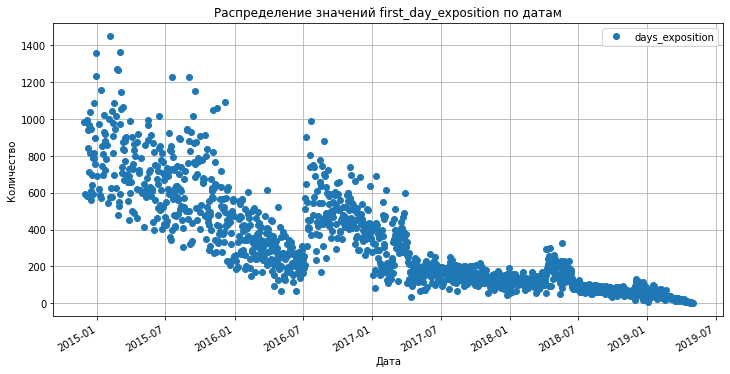

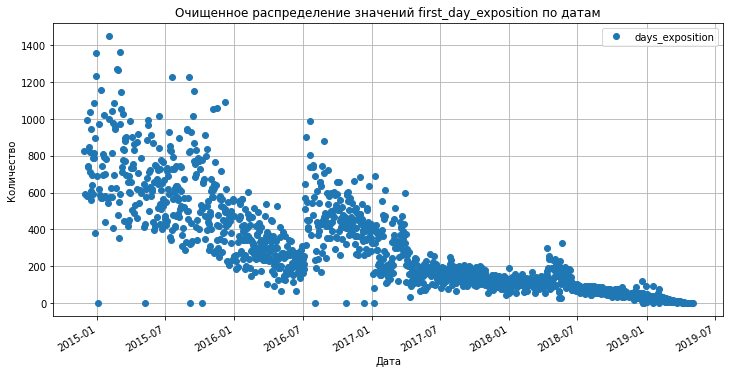

In [8]:
(df
    .pivot_table(index = 'first_day_exposition', values = 'days_exposition')
    .plot( style = 'o', grid= True, figsize=(12,6))
)
plt.title('Распределение значений first_day_exposition по датам')
plt.ylabel('Количество')
plt.xlabel('Дата')
plt.show()
# переведем days_exposition в int и заменим пропуски на 0.
df['days_exposition'] = df['days_exposition'].fillna(0).astype(int)

(df
    .pivot_table(index = 'first_day_exposition', values = 'days_exposition')
    .plot( style = 'o', grid= True, figsize=(12,6))
)
plt.title('Очищенное распределение значений first_day_exposition по датам')
plt.ylabel('Количество')
plt.xlabel('Дата')
plt.show()

In [9]:
df.loc[df['first_day_year']==2019,'days_exposition'] = df['days_exposition'].fillna(0).astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int32         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

Посмотрим на оставшиеся значения:

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

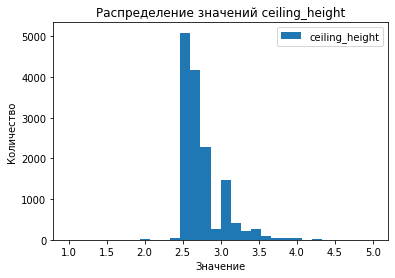

In [11]:
display(df['ceiling_height'].describe())
df.plot( y= 'ceiling_height', kind= 'hist', bins= 30, range=(1,5))
# есть выбросы но можно заменить пропуски и необосновано большие значения на средние.
df.loc[df['ceiling_height'].isna(), ['ceiling_height']] = df['ceiling_height'].median()
df.loc[df['ceiling_height'] > 4,['ceiling_height']] = df['ceiling_height'].median()
df['ceiling_height'].describe()
plt.title('Распределение значений ceiling_height')
plt.ylabel('Количество')
plt.xlabel('Значение')
plt.show()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

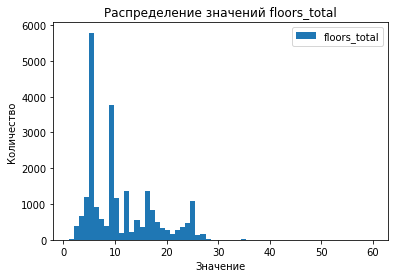

In [12]:
display(df['floors_total'].describe())
df.plot( y= 'floors_total', kind= 'hist', bins= 60, range=(1,60))
# Нельзя утверждать, что высокие значения это выбросы. Заменим пустые значения на медианные.
df['floors_total'].fillna(df['floors_total'].median())
df.loc[df['floors_total'].isna(), 'floors_total'] = df['floors_total'].median()
plt.title('Распределение значений floors_total')
plt.ylabel('Количество')
plt.xlabel('Значение')
plt.show()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

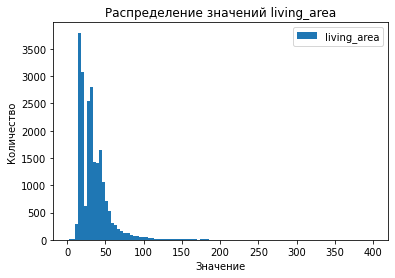

count    23699.000000
mean        34.594076
std         22.354668
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

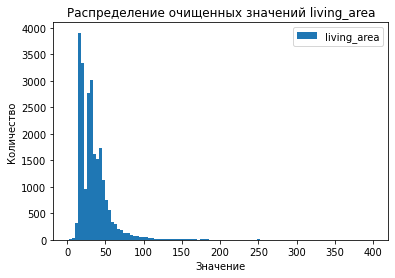

In [13]:
display(df['living_area'].describe())
df.plot( y= 'living_area', kind= 'hist', bins= 100, range=(2,400))
plt.title('Распределение значений living_area')
plt.ylabel('Количество')
plt.xlabel('Значение')
plt.show()

# попробуем вычислить среднюю жилую площадь.
living_area_ratio = (df['total_area'].mean()) / (df['living_area'].mean())
df.loc[df['living_area'].isna(), 'living_area'] = df['total_area'] / living_area_ratio
display(df['living_area'].describe())
df.plot( y= 'living_area', kind= 'hist', bins= 100, range=(2,400))
plt.title('Распределение очищенных значений living_area')
plt.ylabel('Количество')
plt.xlabel('Значение')
plt.show()

In [14]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_day_year
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,True,...,0,Санкт-Петербург,18863,16028,1,482,2,755,0,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.600000,1,True,...,2,посёлок Шушары,12817,18603,0,0,0,0,81,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.300000,4,True,...,0,Санкт-Петербург,21741,13933,1,90,2,574,558,2015
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,90.785766,9,True,...,0,Санкт-Петербург,28098,6800,2,84,3,234,424,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,True,...,0,Санкт-Петербург,31856,8098,2,112,1,48,121,2018


count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

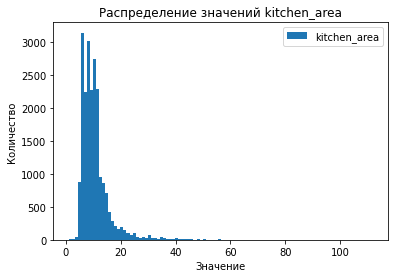

count    23699.000000
mean        10.506288
std          6.040000
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

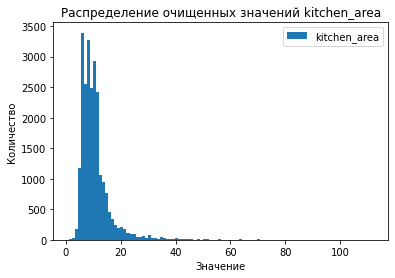

6.000000     1300
10.000000    1262
8.000000     1110
9.000000     1101
7.000000     1062
             ... 
7.780000        1
27.550420       1
11.944937       1
8.940000        1
13.830000       1
Name: kitchen_area, Length: 1693, dtype: int64

In [15]:
display(df['kitchen_area'].describe())
df.plot( y= 'kitchen_area', kind= 'hist', bins= 100, range=(1,112))
plt.title('Распределение значений kitchen_area')
plt.ylabel('Количество')
plt.xlabel('Значение')
plt.show()

kitchen_area_ratio = (df['total_area'].mean()) / (df['kitchen_area'].mean())

df.loc[(df['kitchen_area'].isna()) 
       & ((df['kitchen_area'] + df['living_area']) < df['total_area']), 'kitchen_area'] = df['total_area'] / kitchen_area_ratio

df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = df['total_area'] / kitchen_area_ratio
display(df['kitchen_area'].describe())
df.plot( y= 'kitchen_area', kind= 'hist', bins= 100, range=(1,112))
plt.title('Распределение очищенных значений kitchen_area')
plt.ylabel('Количество')
plt.xlabel('Значение')
plt.show()

df['kitchen_area'].value_counts()

<b> Мы исбавились от пустых значении и привели данные к нужному формату. Остались вопросы к колонке с названием населённых пунктов, но не будем сейчас на них останавливаться так как не известно из-за чего возникли ошибки. Возможно опечатки или разница между привычным (упрощенном) названии населенного пункта среди людей и названии взятых с карт.  </b>

<a id='2.3-bullet'></a>
## Расчёты и добавление результатов в таблицу

<b>3.1. Посчитаем цену квадратного метра.

In [16]:
df['price_per_square_meter'] = df['last_price'] / df['total_area']

<b>3.2. Создаем столбцы день недели, месяц и год публикации объявления.

In [17]:

df['weekday'] = pd.DatetimeIndex(df['first_day_exposition']).day 
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year

<b>3.3. Добавляем колонку с этажностью.

In [18]:
#создаем функцию для автоматического подбора.
def floor_name(raw):
    if raw['floor'] == 1:
        return 'первый'
    elif raw['floor'] == raw['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [19]:
df['floor_category']= df.apply(floor_name, axis= 1)

<b>3.4. Добавляем колонку с соотношением жилой и общей площади, а также отношение площади кухни к общей.

In [20]:
df['living/total_area_ratio']= df['living_area'] / df['total_area']
df['kitchen/total_area_ratio']= df['kitchen_area'] / df['total_area']
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,first_day_year,price_per_square_meter,weekday,month,year,floor_category,living/total_area_ratio,kitchen/total_area_ratio
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.000000,8,True,...,755,0,2019,120370.370370,7,3,2019,другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.600000,1,True,...,0,81,2018,82920.792079,4,12,2018,первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.300000,4,True,...,574,558,2015,92785.714286,20,8,2015,другой,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,90.785766,9,True,...,234,424,2015,408176.100629,24,7,2015,другой,0.570980,0.175146
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.000000,13,True,...,48,121,2018,100000.000000,19,6,2018,другой,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.300000,3,True,...,381,0,2017,72490.845228,21,3,2017,другой,0.547792,0.103356
23695,14,3100000,59.00,2018-01-15,3,2.65,5.0,38.000000,4,True,...,0,45,2018,52542.372881,15,1,2018,другой,0.644068,0.144068
23696,18,2500000,56.70,2018-02-11,2,2.65,3.0,29.700000,1,True,...,0,0,2018,44091.710758,11,2,2018,первый,0.523810,0.175146
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,43.822689,12,True,...,196,602,2017,149511.400651,28,3,2017,другой,0.570980,0.303583


<a id='3.1-bullet'></a>
# Исследовательский анализ данных

## Изучим следующие параметры:

1. Площадь

In [21]:
df['total_area'].unique()

array([108.  ,  40.4 ,  56.  , ...,  66.86, 133.81,  76.75])

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

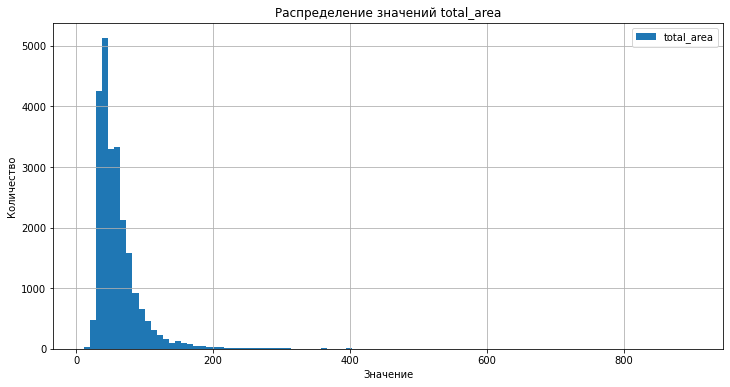

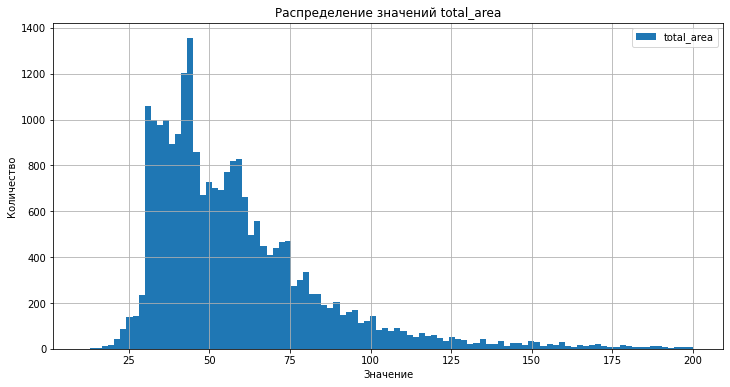

In [22]:
display(df['total_area'].describe())
df.plot(y = 'total_area', kind= 'hist', bins= 100, figsize= (12,6), range= (11,900), grid= True)
plt.title('Распределение значений total_area')
plt.ylabel('Количество')
plt.xlabel('Значение')
plt.show()
df.plot(y = 'total_area', kind= 'hist', bins= 100, figsize= (12,6), range= (11,200), grid= True)
plt.title('Распределение значений total_area')
plt.ylabel('Количество')
plt.xlabel('Значение')
plt.show()

2. Цена

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

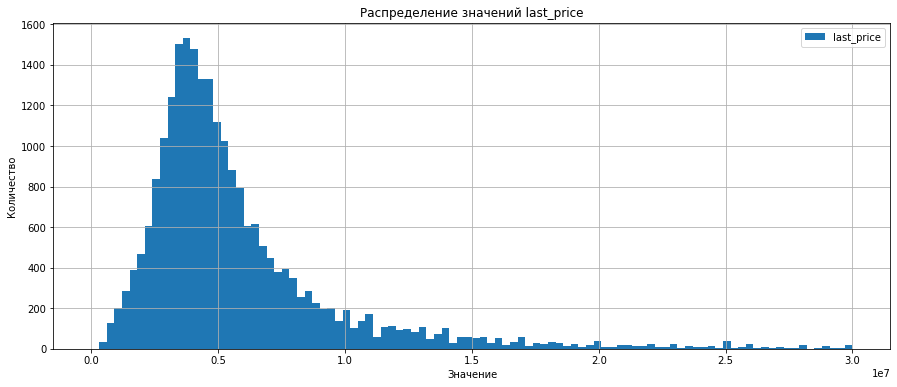

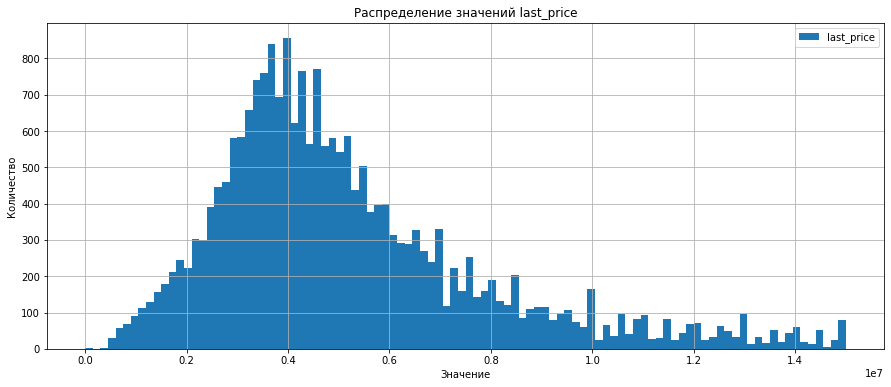

In [23]:
display(df['last_price'].describe())
df.plot(y = 'last_price', kind= 'hist', bins= 100, figsize= (15,6),range= (0,30000000), grid= True)
plt.title('Распределение значений last_price')
plt.ylabel('Количество')
plt.xlabel('Значение')
plt.show()
df.plot(y = 'last_price', kind= 'hist', bins= 100, figsize= (15,6),range= (0,15000000), grid= True)
plt.title('Распределение значений last_price')
plt.ylabel('Количество')
plt.xlabel('Значение')
plt.show()

3. Число комнат

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

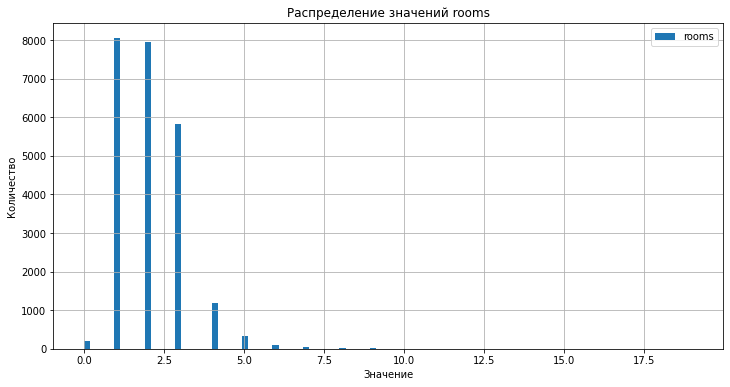

In [24]:
display(df['rooms'].describe())
df.plot(y = 'rooms', kind= 'hist', bins= 100, figsize= (12,6), range= (0, 19), grid= True)
plt.title('Распределение значений rooms')
plt.ylabel('Количество')
plt.xlabel('Значение')
plt.show()

4. Высота потолков

count    23699.000000
mean         2.693051
std          0.204967
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

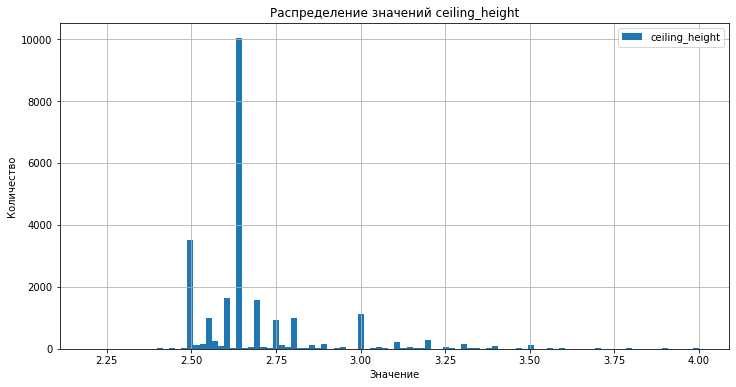

In [25]:
display(df['ceiling_height'].describe())
df.plot(y = 'ceiling_height', kind= 'hist', bins= 100, figsize= (12,6), range= (2.2, 4), grid= True)
plt.title('Распределение значений ceiling_height')
plt.ylabel('Количество')
plt.xlabel('Значение')
plt.show()

Изучив данные можно сделать вывод, что бошльшая часть квартир имеет площадь от 30 до 70 метров. Их стоимось, в среднем, от 4 до 6 мл. Преобладают однокомнатные и двухкомнатные кв., их число почти равно. Средняя высота потолков 2,6 метров

<a id='3.2-bullet'></a>
## Изучим время продажи квартиры:

count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

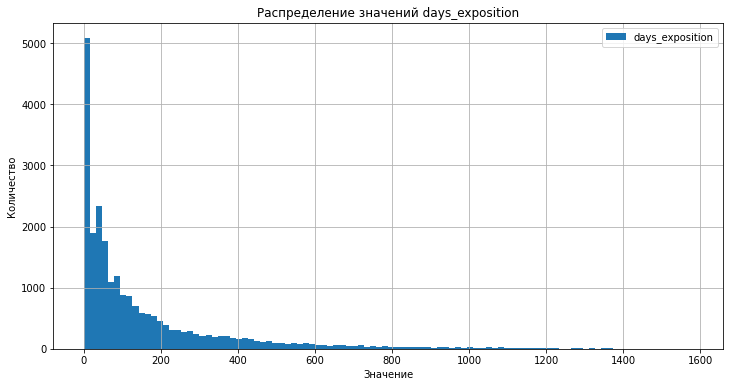

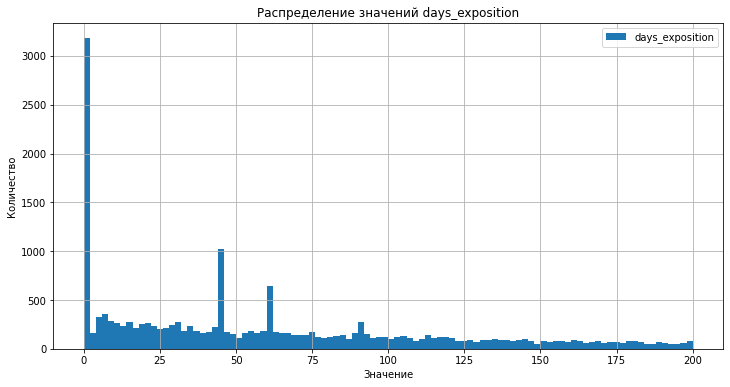

In [26]:
display(df['days_exposition'].describe())
df.plot(y = 'days_exposition', kind= 'hist', bins= 100, figsize= (12,6), range= (0, 1580), grid= True)
plt.title('Распределение значений days_exposition')
plt.ylabel('Количество')
plt.xlabel('Значение')
plt.show()
df.plot(y = 'days_exposition', kind= 'hist', bins= 100, figsize= (12,6), range= (0, 200), grid= True)
plt.title('Распределение значений days_exposition')
plt.ylabel('Количество')
plt.xlabel('Значение')
plt.show()

Отбросив нулевые значения, многие успешно продают около 45го, 60го и 90го дня. Среднее время продажи 156 дней, а медианное 74. Можно считать, что продажи прошли очень быстро если Завершилась в первые 7 дней и очень медленно если больше 90.

<a id='3.3-bullet'></a>
## Разбор редких и выбивающихся значении:

In [27]:
df['days_exposition'].value_counts().head(15)
# Подтвердил методом value_counts пиковые, (выбивающиеся) значения. 

0     3181
45     880
60     538
7      234
30     208
90     204
4      176
3      158
5      152
14     148
9      143
20     139
8      139
44     138
11     135
Name: days_exposition, dtype: int64

Предлагаю создать отдельный df с чистыми данными для сравнения.

In [28]:
df_clean = df.copy().query('days_exposition != 0 and days_exposition != 45 and days_exposition != 60 and days_exposition != 90')

count    18896.000000
mean       191.640188
std        225.707795
min          1.000000
25%         41.000000
50%        110.000000
75%        252.000000
max       1580.000000
Name: days_exposition, dtype: float64

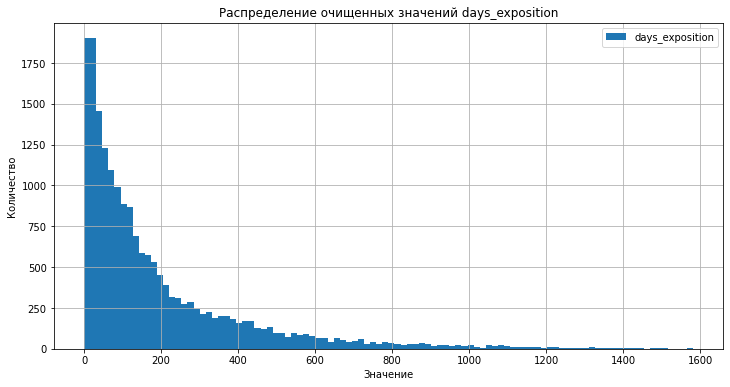

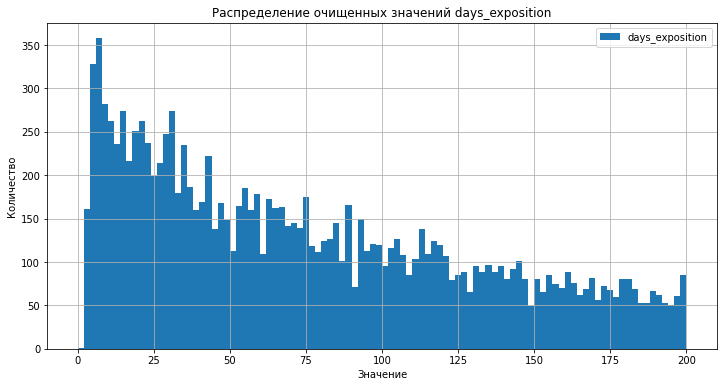

In [29]:
display(df_clean['days_exposition'].describe())
df_clean.plot(y = 'days_exposition', kind= 'hist', bins= 100, figsize= (12,6), range= (0, 1580), grid= True)
plt.title('Распределение очищенных значений days_exposition')
plt.ylabel('Количество')
plt.xlabel('Значение')
plt.show()
df_clean.plot(y = 'days_exposition', kind= 'hist', bins= 100, figsize= (12,6), range= (0, 200), grid= True)
plt.title('Распределение очищенных значений days_exposition')
plt.ylabel('Количество')
plt.xlabel('Значение')
plt.show()

Убрав аномальные значения график стал плавный. Нельзя однозначно утверждать, что по истечению этого времени, недвижимость была продана так как могла быть просто досрочно снята с продажи. 

<a id='3.4-bullet'></a>
## Изучим факторы влияющие на стоимость квартир.

In [30]:
df.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_around3000,ponds_nearest,days_exposition,first_day_year,price_per_square_meter,weekday,month,year,living/total_area_ratio,kitchen/total_area_ratio
total_images,1.000000,0.104473,0.115352,0.099288,0.049408,0.011120,0.101883,0.031340,0.039860,-0.029303,...,0.011323,0.010240,-0.055593,0.140411,0.132780,0.010248,0.005043,0.140411,-0.001044,-0.019420
last_price,0.104473,1.000000,0.653675,0.363343,0.267835,-0.007003,0.585787,0.026576,0.000640,-0.025362,...,0.208621,0.089704,0.053577,-0.043089,0.736499,0.009172,0.002779,-0.043089,0.002602,-0.075715
total_area,0.115352,0.653675,1.000000,0.758344,0.376569,-0.075674,0.946077,-0.024754,-0.007836,-0.072653,...,0.200294,0.087529,0.097039,-0.079912,0.301960,0.004546,0.004920,-0.079912,0.133529,-0.294553
rooms,0.099288,0.363343,0.758344,1.000000,0.245772,-0.227649,0.827205,-0.150862,-0.005338,-0.147286,...,0.121276,0.058442,0.079293,-0.055418,0.055420,0.004287,-0.004469,-0.055418,0.462351,-0.548746
ceiling_height,0.049408,0.267835,0.376569,0.245772,1.000000,-0.077822,0.356708,-0.045150,-0.037770,0.005249,...,0.219123,0.088767,0.072210,-0.051030,0.281864,-0.005939,-0.006333,-0.051030,-0.009327,-0.004016
floors_total,0.011120,-0.007003,-0.075674,-0.227649,-0.077822,1.000000,-0.159148,0.674346,-0.003804,0.069103,...,-0.048751,0.017013,-0.026103,0.008060,0.147840,-0.002865,0.016625,0.008060,-0.348495,0.327424
living_area,0.101883,0.585787,0.946077,0.827205,0.356708,-0.159148,1.000000,-0.089406,-0.005155,-0.056494,...,0.183407,0.082130,0.091079,-0.072209,0.232243,0.004662,-0.000448,-0.072209,0.396200,-0.444175
floor,0.031340,0.026576,-0.024754,-0.150862,-0.045150,0.674346,-0.089406,1.000000,-0.006182,0.036940,...,-0.029710,0.013698,-0.021349,0.004915,0.129068,0.000841,0.019387,0.004915,-0.252849,0.228459
is_apartment,0.039860,0.000640,-0.007836,-0.005338,-0.037770,-0.003804,-0.005155,-0.006182,1.000000,0.003569,...,-0.009392,0.007297,-0.068959,0.216585,0.006406,-0.009439,0.111619,0.216585,0.002318,0.001329
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.005249,0.069103,-0.056494,0.036940,0.003569,1.000000,...,-0.009690,-0.004826,-0.017766,0.011961,0.015636,-0.012833,0.000976,0.011961,0.085669,-0.012637


Болше всего цена зависит от общей площади квартиры. Корреляция равна 0.653675. В меньшей степени от числа комнат кор= 0.3. Удаленность от центра имеет слабое влияние на цену. Скорее всего из-за 'элитных' жк далеко от центра.

In [31]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<a id='3.5-bullet'></a>
## Найдем 10 населённых пунктов с наибольшим числом объявлений 

In [32]:
locality_name_pivot = df.pivot_table(index= 'locality_name', values='price_per_square_meter', aggfunc= ('count', 'mean'))
locality_name_pivot.columns = ['Число объявлений.', 'Средняя цена квадратного метра.']

# Находим 10 населённых пунктов с наибольшим числом объявлений и считаем среднюю цену квадратного метра.
display(locality_name_pivot.sort_values( by= 'Число объявлений.', ascending= False).head(10))
print()
#Выделяем населённые пункты с самой высокой стоимостью жилья.
print('Пункт с самой высокой стоимостью жилья:')
display(locality_name_pivot.sort_values( by= 'Средняя цена квадратного метра.', ascending= False).head(1))
print()
#Выделяем населённые пункты с самой низкой стоимостью жилья.
print('Пункт с самой низкой стоимостью жилья:')
display(locality_name_pivot.sort_values( by= 'Средняя цена квадратного метра.', ascending= False).tail(1))

,Число объявлений.,Средняя цена квадратного метра.
locality_name,,
Санкт-Петербург,15721,114849.008794
посёлок Мурино,522,85752.189195
посёлок Шушары,440,78677.364217
Всеволожск,398,68654.473986
Пушкин,369,103125.819291
Колпино,338,75424.579098
посёлок Парголово,327,90175.913458
Гатчина,307,68746.146763
деревня Кудрово,299,92473.547576



Пункт с самой высокой стоимостью жилья:


,Число объявлений.,Средняя цена квадратного метра.
locality_name,,
посёлок Лисий Нос,2,121616.221359



Пункт с самой низкой стоимостью жилья:


,Число объявлений.,Средняя цена квадратного метра.
locality_name,,
деревня Старополье,3,11206.221198


<a id='3.6-bullet'></a>
## Изучим сегмент квартир в центре.

In [33]:
# Для начала переведем данные в км.
df['cityCenters_nearest_km'] = df['cityCenters_nearest']/1000
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].round().astype(int)

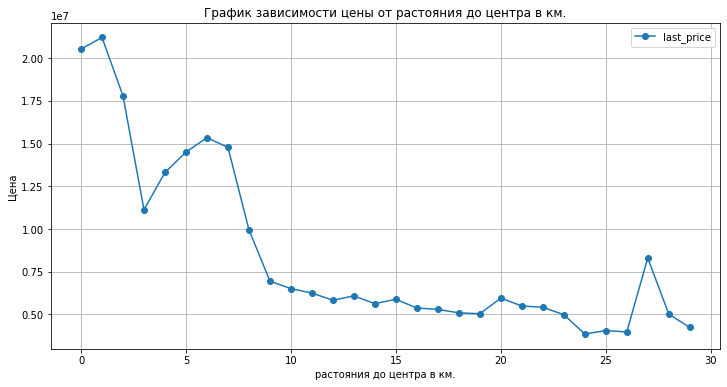

In [34]:
# Теперь построим график зависимости цена от растояния до центра в км. 
(df
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table( index= 'cityCenters_nearest_km', values= 'last_price')
    .plot( style='o-', grid=True, figsize=(12, 6))
)
plt.title('График зависимости цены от растояния до центра в км.')
plt.ylabel('Цена')
plt.xlabel('растояния до центра в км.')
plt.show()

Видим сильные изменения ниже 4 км от центра. Можно сделать вывод, что это и есть центральная зона.

<a id='3.7-bullet'></a>
## Для сегмента квартир в центре исследуем параметры:

In [35]:
apartment_downtown = df.query('cityCenters_nearest_km <= 4')

<b> 1. Площадь

Новые значения


count    7098.000000
mean       60.441937
std        35.759921
min        12.000000
25%        39.000000
50%        52.000000
75%        70.000000
max       517.000000
Name: total_area, dtype: float64

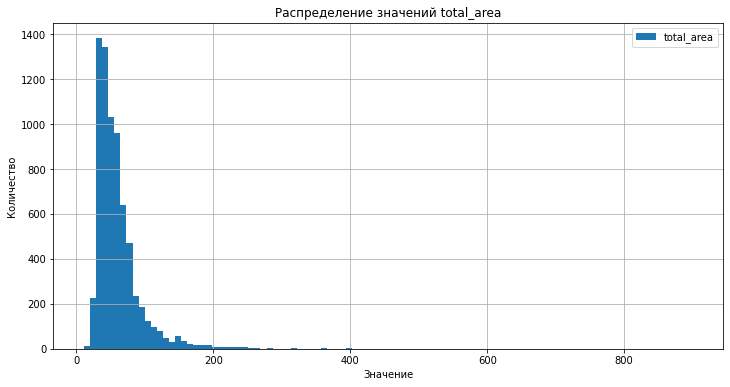

Старые значения


count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

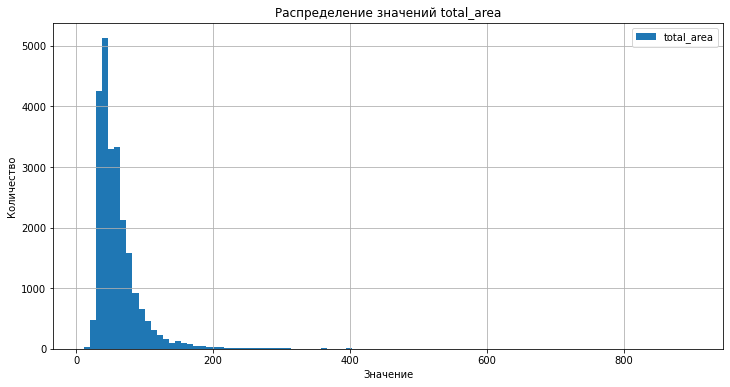

In [36]:
print('Новые значения')
display(apartment_downtown['total_area'].describe())
apartment_downtown.plot(y = 'total_area', kind= 'hist', bins= 100, figsize= (12,6), range= (11,900), grid= True)
plt.title('Распределение значений total_area')
plt.ylabel('Количество')
plt.xlabel('Значение')
plt.show()

print('Старые значения')
display(df['total_area'].describe())
df.plot(y = 'total_area', kind= 'hist', bins= 100, figsize= (12,6), range= (11,900), grid= True)
plt.title('Распределение значений total_area')
plt.ylabel('Количество')
plt.xlabel('Значение')
plt.show()

<b> 2. Цена

Новые значения


count    7.098000e+03
mean     5.771616e+06
std      1.461684e+07
min      4.300000e+05
25%      2.270000e+06
50%      3.290000e+06
75%      5.496750e+06
max      7.630000e+08
Name: last_price, dtype: float64

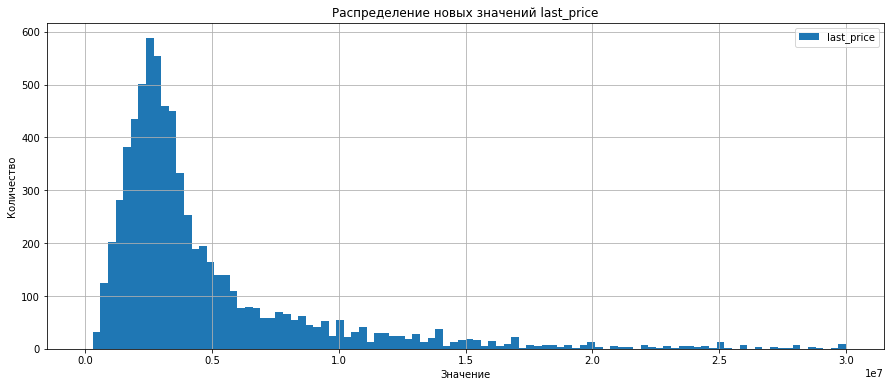

Старые значения


count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

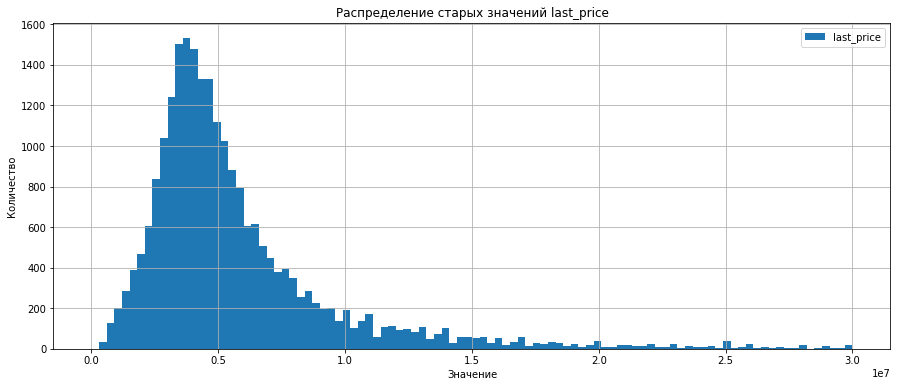

In [37]:
print('Новые значения')
display(apartment_downtown['last_price'].describe())
apartment_downtown.plot(y = 'last_price', kind= 'hist', bins= 100, figsize= (15,6),range= (0,30000000), grid= True)
plt.title('Распределение новых значений last_price')
plt.ylabel('Количество')
plt.xlabel('Значение')
plt.show()

print('Старые значения')
display(df['last_price'].describe())
df.plot(y = 'last_price', kind= 'hist', bins= 100, figsize= (15,6),range= (0,30000000), grid= True)
plt.title('Распределение старых значений last_price')
plt.ylabel('Количество')
plt.xlabel('Значение')
plt.show()

<b>3. Число комнат

Новые значения


count    7098.000000
mean        2.110735
std         1.166857
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64

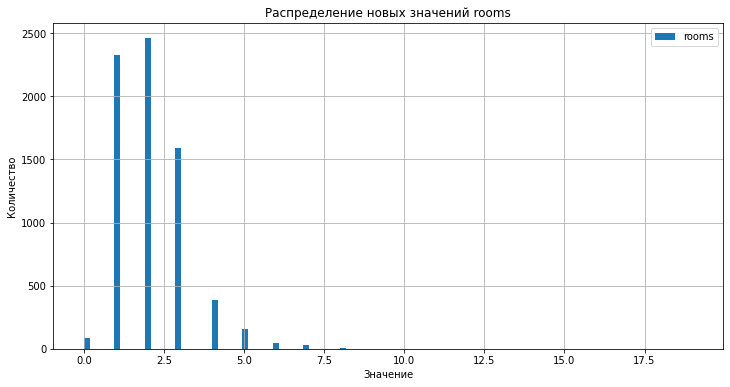

Старые значения


count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

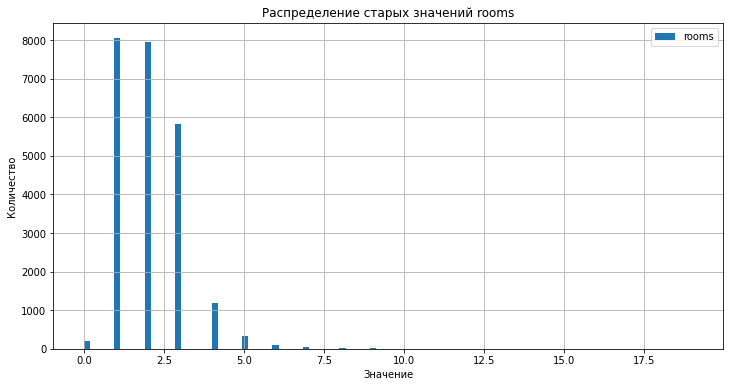

In [38]:
print('Новые значения')
display(apartment_downtown['rooms'].describe())
apartment_downtown.plot(y = 'rooms', kind= 'hist', bins= 100, figsize= (12,6), range= (0, 19), grid= True)
plt.title('Распределение новых значений rooms')
plt.ylabel('Количество')
plt.xlabel('Значение')
plt.show()

print('Старые значения')
display(df['rooms'].describe())
df.plot(y = 'rooms', kind= 'hist', bins= 100, figsize= (12,6), range= (0, 19), grid= True)
plt.title('Распределение старых значений rooms')
plt.ylabel('Количество')
plt.xlabel('Значение')
plt.show()

<b> 4. Высота потолков

Новые значения


count    7098.000000
mean        2.716810
std         0.244922
min         1.200000
25%         2.600000
50%         2.650000
75%         2.700000
max         4.000000
Name: ceiling_height, dtype: float64

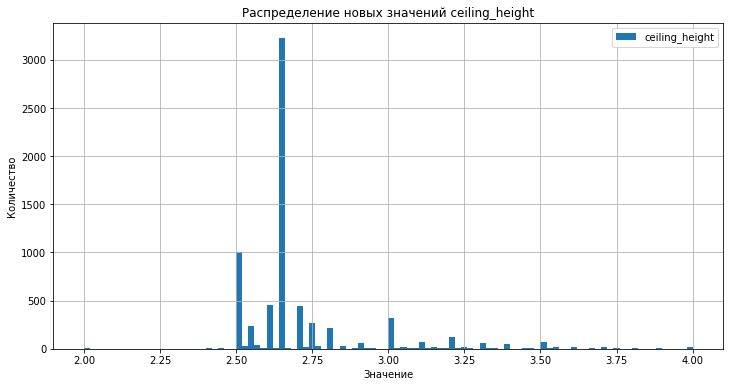

Старые значения


count    23699.000000
mean         2.693051
std          0.204967
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

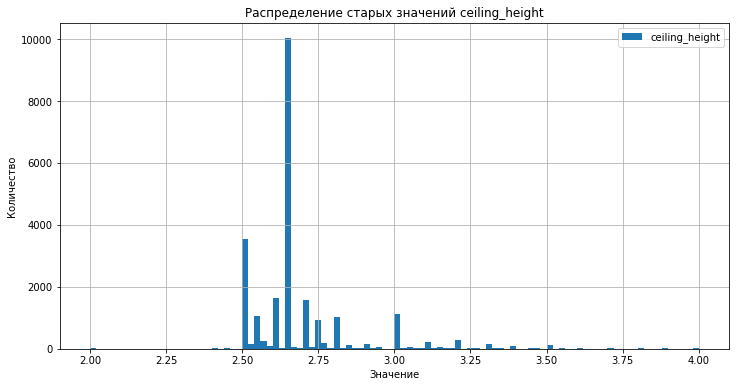

In [39]:
print('Новые значения')
display(apartment_downtown['ceiling_height'].describe())
apartment_downtown.plot(y = 'ceiling_height', kind= 'hist', bins= 100, figsize= (12,6), range= (2, 4), grid= True)
plt.title('Распределение новых значений ceiling_height')
plt.ylabel('Количество')
plt.xlabel('Значение')
plt.show()

print('Старые значения')
display(df['ceiling_height'].describe())
df.plot(y = 'ceiling_height', kind= 'hist', bins= 100, figsize= (12,6), range= (2, 4), grid= True)
plt.title('Распределение старых значений ceiling_height')
plt.ylabel('Количество')
plt.xlabel('Значение')
plt.show()

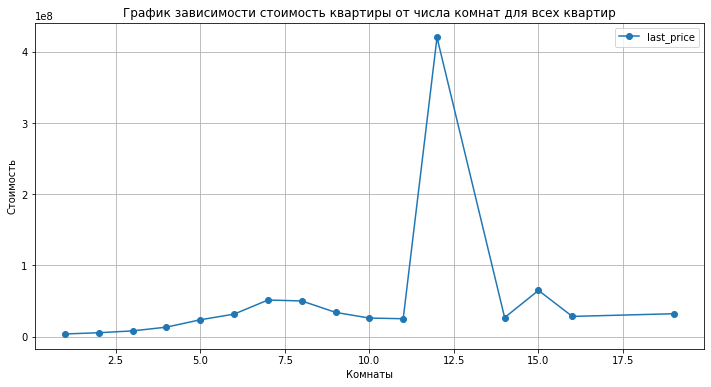

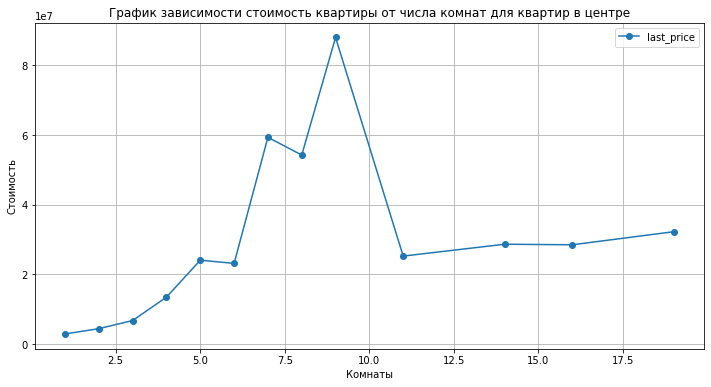

In [40]:
# Сравним график зависимости стоимость квартиры от числа комнат для всех квартир и квартир в центре:
(df
    .query('rooms > 0')
    .pivot_table(index = 'rooms', values = 'last_price')
    .plot( style = 'o-', grid= True, figsize=(12,6))
)
plt.title('График зависимости стоимость квартиры от числа комнат для всех квартир')
plt.ylabel('Стоимость')
plt.xlabel('Комнаты')
plt.show()

(apartment_downtown
    .query('rooms > 0')
    .pivot_table(index = 'rooms', values = 'last_price')
    .plot( style = 'o-', grid= True, figsize=(12,6))
)
plt.title('График зависимости стоимость квартиры от числа комнат для квартир в центре')
plt.ylabel('Стоимость')
plt.xlabel('Комнаты')
plt.show()

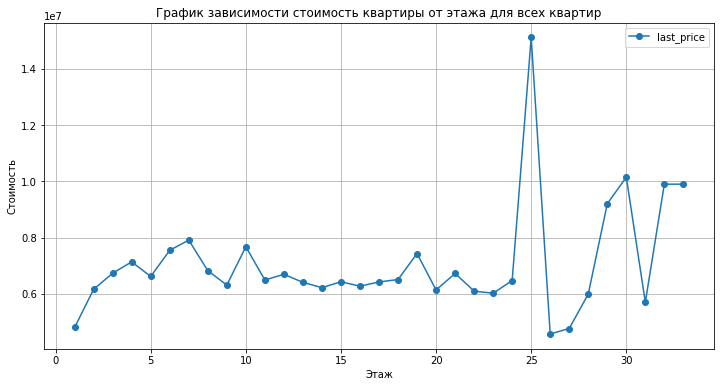

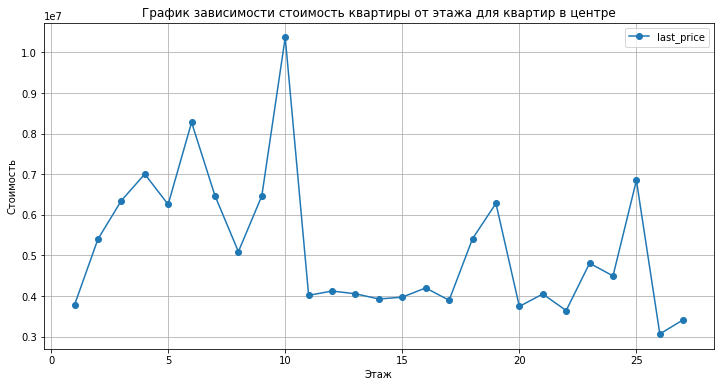

In [41]:
# Сравним график зависимости стоимость квартиры от этажа, для всех квартир и квартир в центре:
(df
    .pivot_table(index = 'floor', values = 'last_price')
    .plot( style = 'o-', grid= True, figsize=(12,6))
)
plt.title('График зависимости стоимость квартиры от этажа для всех квартир')
plt.ylabel('Стоимость')
plt.xlabel('Этаж')
plt.show()

(apartment_downtown
    .pivot_table(index = 'floor', values = 'last_price')
    .plot( style = 'o-', grid= True, figsize=(12,6))
)
plt.title('График зависимости стоимость квартиры от этажа для квартир в центре')
plt.ylabel('Стоимость')
plt.xlabel('Этаж')
plt.show()

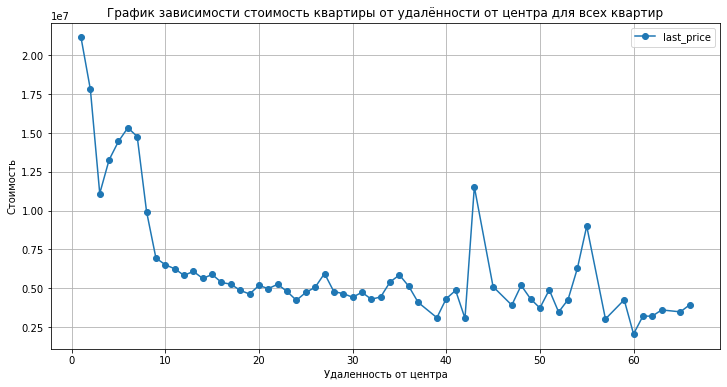

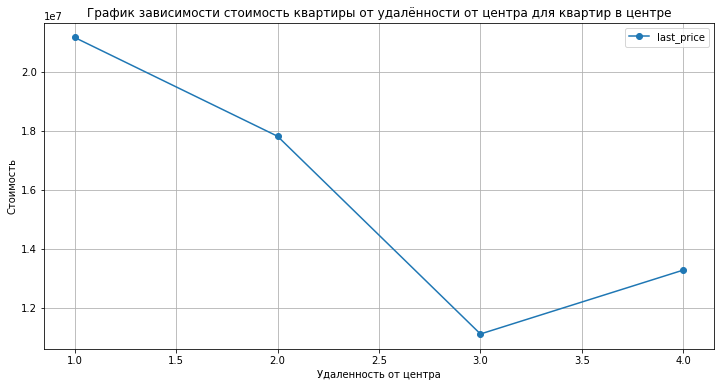

In [42]:
# Сравним график зависимости стоимость квартиры от удалённости от центра, для всех квартир и квартир в центре:
(df
    .query('cityCenters_nearest_km > 0')
    .pivot_table(index = 'cityCenters_nearest_km', values = 'last_price')
    .plot( style = 'o-', grid= True, figsize=(12,6))
)
plt.title('График зависимости стоимость квартиры от удалённости от центра для всех квартир')
plt.ylabel('Стоимость')
plt.xlabel('Удаленность от центра')
plt.show()
(apartment_downtown
    .query('cityCenters_nearest_km > 0')
    .pivot_table(index = 'cityCenters_nearest_km', values = 'last_price')
    .plot( style = 'o-', grid= True, figsize=(12,6))
)
plt.title('График зависимости стоимость квартиры от удалённости от центра для квартир в центре')
plt.ylabel('Стоимость')
plt.xlabel('Удаленность от центра')
plt.show()

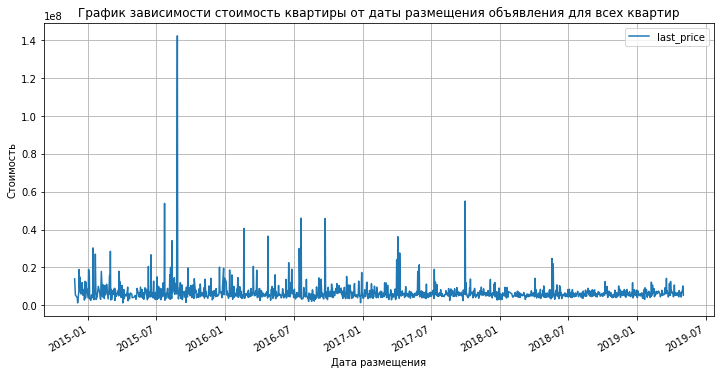

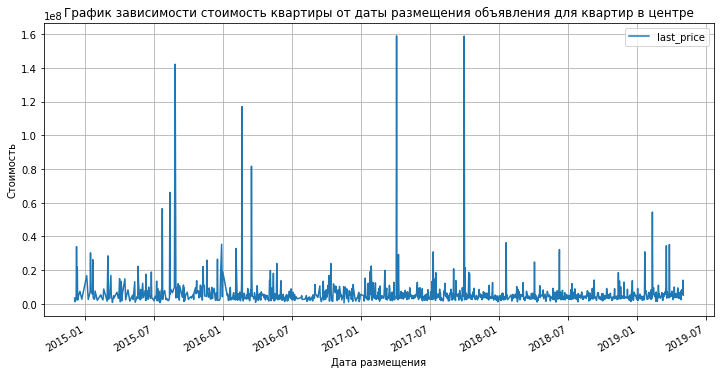

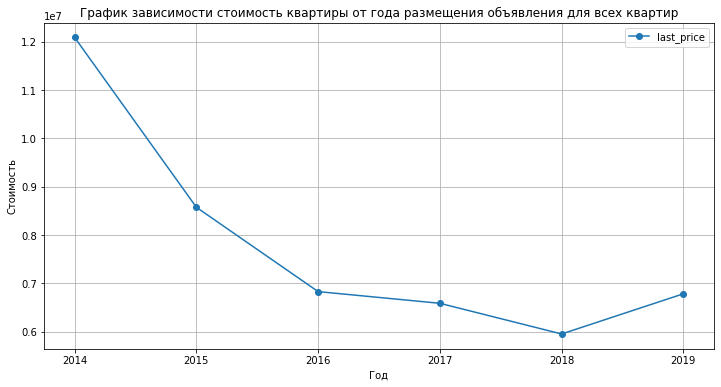

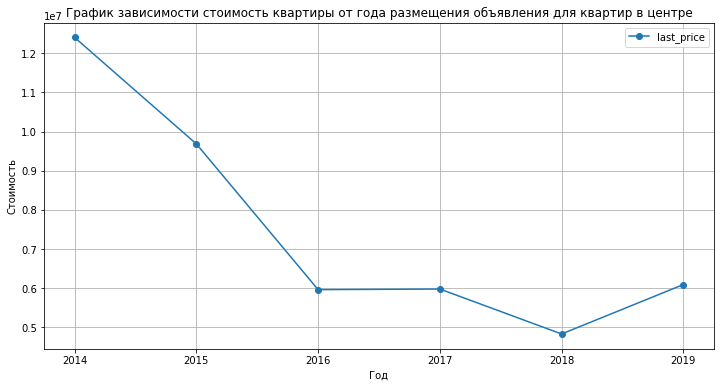

In [43]:
# Сравним график зависимости стоимость квартиры и дату размещения объявления, для всех квартир и квартир в центре:
(df
    .pivot_table(index = 'first_day_exposition', values = 'last_price')
    .plot( style = '-', grid= True, figsize=(12,6))
)
plt.title('График зависимости стоимость квартиры от даты размещения объявления для всех квартир')
plt.ylabel('Стоимость')
plt.xlabel('Дата размещения')
plt.show()
(apartment_downtown
    .pivot_table(index = 'first_day_exposition', values = 'last_price')
    .plot( style = '-', grid= True, figsize=(12,6))
)
plt.title('График зависимости стоимость квартиры от даты размещения объявления для квартир в центре')
plt.ylabel('Стоимость')
plt.xlabel('Дата размещения')
plt.show()
(df
    .pivot_table(index = 'year', values = 'last_price')
    .plot( style = 'o-', grid= True, figsize=(12,6))
)
plt.title('График зависимости стоимость квартиры от года размещения объявления для всех квартир')
plt.ylabel('Стоимость')
plt.xlabel('Год')
plt.show()
(apartment_downtown
    .pivot_table(index = 'year', values = 'last_price')
    .plot( style = 'o-', grid= True, figsize=(12,6))
)
plt.title('График зависимости стоимость квартиры от года размещения объявления для квартир в центре')
plt.ylabel('Стоимость')
plt.xlabel('Год')
plt.show()

<b>Вывод: </b>
Сравнив графики и значения можно заметить, что 
1. Квартиры ближе к центру меньше по площади. 
2. Среди квартир в центре средняя цена меньше чем в общей. Возможно обусловленно тем, что в общую базу попали квартиры в 'элитных' районов.
3. В центре больше однокомнатных квартир.
4. Высота потолков существенно не меняется.

* Сравнив график зависимости стоимость квартиры от числа комнат делаем вывод, что в центре цена на комнату выше.
* Сравнив график зависимости стоимость квартиры от этажа, делаем вывод, что самые дорогие кв на 6ом и 10ом этаже в то время как в общем на 25, 30ом этаже.
* Сравнив график зависимости стоимость квартиры от удалённости от центра, ожидаемо видим, что чем ближе к центру, тем цена выше.
* Сравнив график зависимости стоимость квартиры и дату размещения объявления, видим, что до 2018ого года была тенденция на снижение цены.

## Общий вывод

Проанализировав данные, мы нашли много пустых значении, дубликатов и проблемы с типами данных. Исправив проблемы, мы посчитали и добавили в таблицу цену квадратного метра, день недели, месяц и год публикации объявления, этаж квартиры, соотношение жилой и общей площади, а также отношение площади кухни к общей. Провели исследовательский анализ данных который показал, что  бошльшая часть квартир имеет площадь от 30 до 70 метров. Их стоимось, в среднем, от 4 до 6 мл. Преобладают однокомнатные и двухкомнатные кв., их число почти равно, но ближе к центру однокомнатных больше. Средняя высота потолков 2,6 метров. Многие успешно продают или снимают с площадки объявления около 45го, 60го и 90го дня. Среднее время продажи 156 дней, а медианное 74. Можно считать, что продажи прошли очень быстро если Завершилась в первые 7 дней и очень медленно если больше 90. Болше всего цена зависит от общей площади квартиры. Корреляция равна 0.653675. В меньшей степени от числа комнат кор= 0.3. Удаленность от центра имеет слабое влияние на цену. Скорее всего из-за 'элитных' жк далеко от центра. Центром можно считать все квартиры находящиеся в радиусе 4 км от центра. 